# Auto MPG dataset


In [1]:
import numpy as np
import math

In [2]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
auto_mpg = fetch_ucirepo(id=9)

# data (as pandas dataframes)
X = auto_mpg.data.features
y = auto_mpg.data.mpgs

# metadata
print(auto_mpg.metadata)

# variable information
print(auto_mpg.variables)

{'uci_id': 9, 'name': 'Auto MPG', 'repository_url': 'https://archive.ics.uci.edu/dataset/9/auto+mpg', 'data_url': 'https://archive.ics.uci.edu/static/public/9/data.csv', 'abstract': 'Revised from CMU StatLib library, data concerns city-cycle fuel consumption', 'area': 'Other', 'tasks': ['Regression'], 'characteristics': ['Multivariate'], 'num_instances': 398, 'num_features': 7, 'feature_types': ['Real', 'Categorical', 'Integer'], 'demographics': [], 'target_col': ['mpg'], 'index_col': ['car_name'], 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1993, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5859H', 'creators': ['R. Quinlan'], 'intro_paper': None, 'additional_info': {'summary': 'This dataset is a slightly modified version of the dataset provided in the StatLib library.  In line with the use by Ross Quinlan (1993) in predicting the attribute "mpg", 8 of the original instances were removed because they had unknown values for th

In [3]:
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request

url = "https://archive.ics.uci.edu/static/public/9/data.csv"

In [4]:
auto_mpg = pd.read_csv(url)

In [5]:
auto_mpg.to_csv("AUTO_mpg_Dataset.csv", index=False)

In [6]:
auto_mpg

,car_name,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,mpg
0,"chevrolet,chevelle,malibu",8,307.0,130.0,3504,12.0,70,1,18.0
1,"buick,skylark,320",8,350.0,165.0,3693,11.5,70,1,15.0
2,"plymouth,satellite",8,318.0,150.0,3436,11.0,70,1,18.0
3,"amc,rebel,sst",8,304.0,150.0,3433,12.0,70,1,16.0
4,"ford,torino",8,302.0,140.0,3449,10.5,70,1,17.0
...,...,...,...,...,...,...,...,...,...
393,"ford,mustang,gl",4,140.0,86.0,2790,15.6,82,1,27.0
394,"vw,pickup",4,97.0,52.0,2130,24.6,82,2,44.0
395,"dodge,rampage",4,135.0,84.0,2295,11.6,82,1,32.0
396,"ford,ranger",4,120.0,79.0,2625,18.6,82,1,28.0


In [7]:
auto_mpg.head()

,car_name,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,mpg
0,"chevrolet,chevelle,malibu",8,307.0,130.0,3504,12.0,70,1,18.0
1,"buick,skylark,320",8,350.0,165.0,3693,11.5,70,1,15.0
2,"plymouth,satellite",8,318.0,150.0,3436,11.0,70,1,18.0
3,"amc,rebel,sst",8,304.0,150.0,3433,12.0,70,1,16.0
4,"ford,torino",8,302.0,140.0,3449,10.5,70,1,17.0


In [8]:
auto_mpg.describe()

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,mpg
count,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864,23.514573
std,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,0.802055,7.815984
min,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000,9.000000
25%,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000,17.500000
50%,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000,23.000000
75%,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000,2.000000,29.000000
max,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000,46.600000


In [9]:
auto_mpg.count()  # horsepower has missing values

car_name        398
cylinders       398
displacement    398
horsepower      392
weight          398
acceleration    398
model_year      398
origin          398
mpg             398
dtype: int64

In [10]:
auto_mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   car_name      398 non-null    object 
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   mpg           398 non-null    float64
dtypes: float64(4), int64(4), object(1)
memory usage: 28.1+ KB


In [11]:
auto_mpg["company"] = auto_mpg["car_name"].str.split(",").str[0]

In [12]:
auto_mpg = auto_mpg.drop(columns="car_name", axis=1)

In [13]:
auto_mpg

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,mpg,company
0,8,307.0,130.0,3504,12.0,70,1,18.0,chevrolet
1,8,350.0,165.0,3693,11.5,70,1,15.0,buick
2,8,318.0,150.0,3436,11.0,70,1,18.0,plymouth
3,8,304.0,150.0,3433,12.0,70,1,16.0,amc
4,8,302.0,140.0,3449,10.5,70,1,17.0,ford
...,...,...,...,...,...,...,...,...,...
393,4,140.0,86.0,2790,15.6,82,1,27.0,ford
394,4,97.0,52.0,2130,24.6,82,2,44.0,vw
395,4,135.0,84.0,2295,11.6,82,1,32.0,dodge
396,4,120.0,79.0,2625,18.6,82,1,28.0,ford


In [14]:
auto_mpg["company"].value_counts()

company
ford             51
chevrolet        43
plymouth         31
amc              28
dodge            28
toyota           25
datsun           23
buick            17
pontiac          16
volkswagen       15
honda            13
mercury          11
mazda            10
oldsmobile       10
fiat              8
peugeot           8
audi              7
chrysler          6
vw                6
volvo             6
renault           5
saab              4
subaru            4
opel              4
chevy             3
bmw               2
cadillac          2
maxda             2
mercedes-benz     2
triumph           1
vokswagen         1
mercedes          1
hi                1
capri             1
chevroelt         1
toyouta           1
nissan            1
Name: count, dtype: int64

array([[<Axes: title={'center': 'cylinders'}>,
        <Axes: title={'center': 'displacement'}>,
        <Axes: title={'center': 'horsepower'}>],
       [<Axes: title={'center': 'weight'}>,
        <Axes: title={'center': 'acceleration'}>,
        <Axes: title={'center': 'model_year'}>],
       [<Axes: title={'center': 'origin'}>,
        <Axes: title={'center': 'mpg'}>, <Axes: >]], dtype=object)

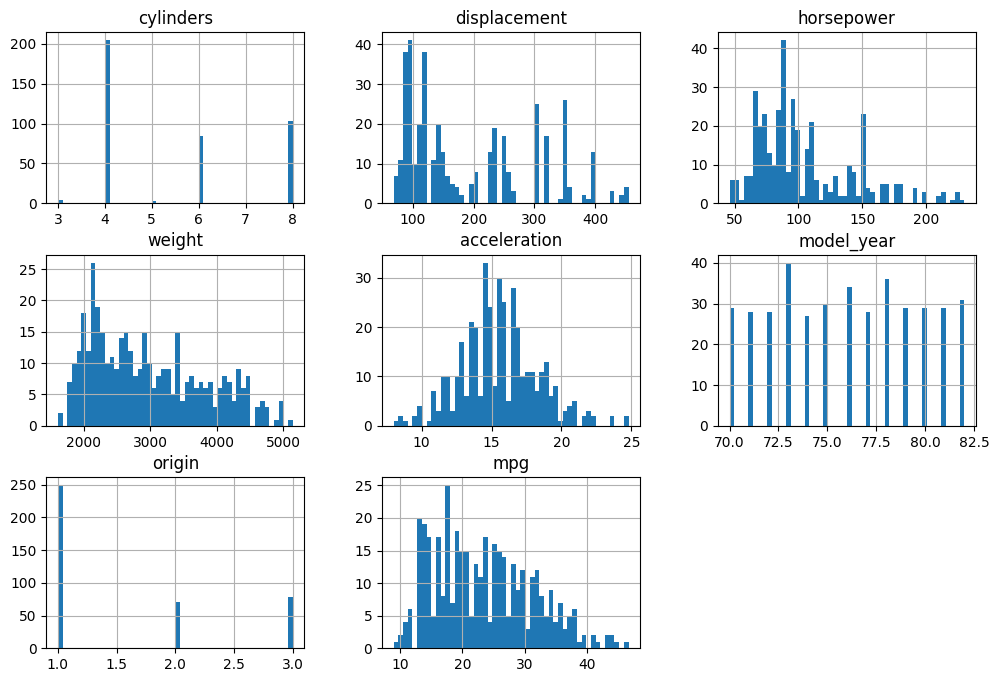

In [15]:
import matplotlib.pyplot as plt

# extra code – the next 5 lines define the default font sizes


auto_mpg.hist(bins=50, figsize=(12, 8))

In [16]:
corr_matrix = auto_mpg.corr(numeric_only=True)
corr_matrix["mpg"].sort_values(ascending=False)

mpg             1.000000
model_year      0.579267
origin          0.563450
acceleration    0.420289
cylinders      -0.775396
horsepower     -0.778427
displacement   -0.804203
weight         -0.831741
Name: mpg, dtype: float64

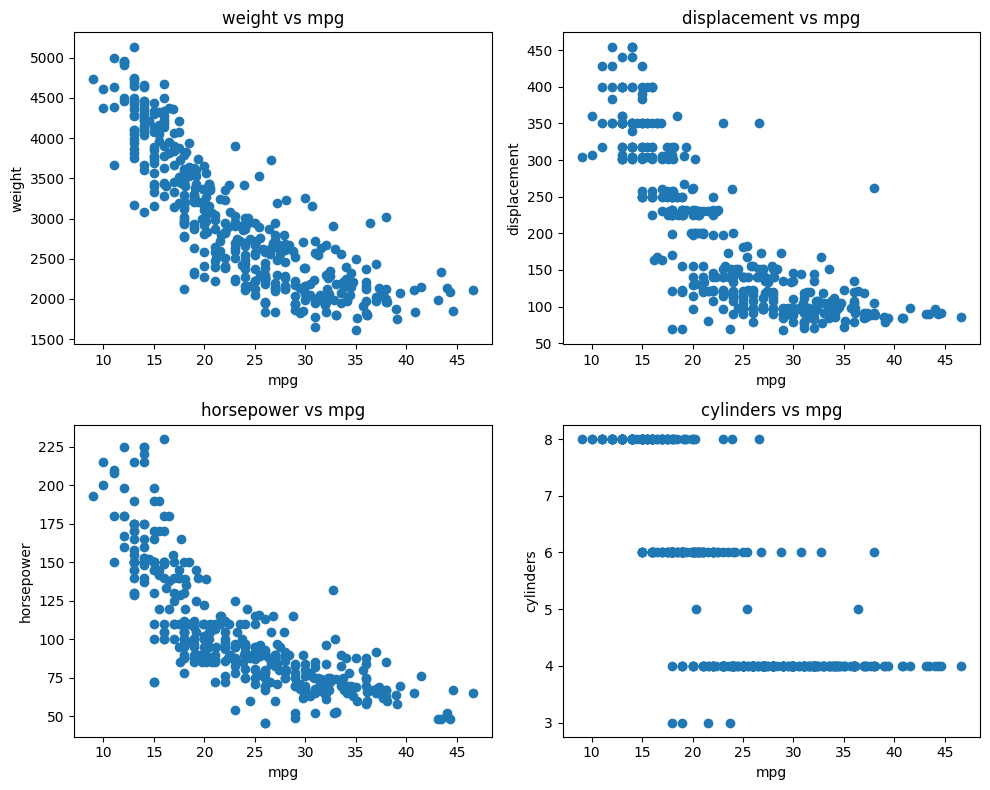

In [17]:
# let's chechk the graph of all strong corelations vs mpg
features = ["weight", "displacement", "horsepower", "cylinders"]
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through each feature and create a scatter plot
for i, feature in enumerate(features):
    axes[i].scatter(auto_mpg["mpg"], auto_mpg[feature])
    axes[i].set_title(f'{feature} vs {"mpg"}')
    axes[i].set_ylabel(feature)
    axes[i].set_xlabel("mpg")

# Adjust layout
plt.tight_layout()

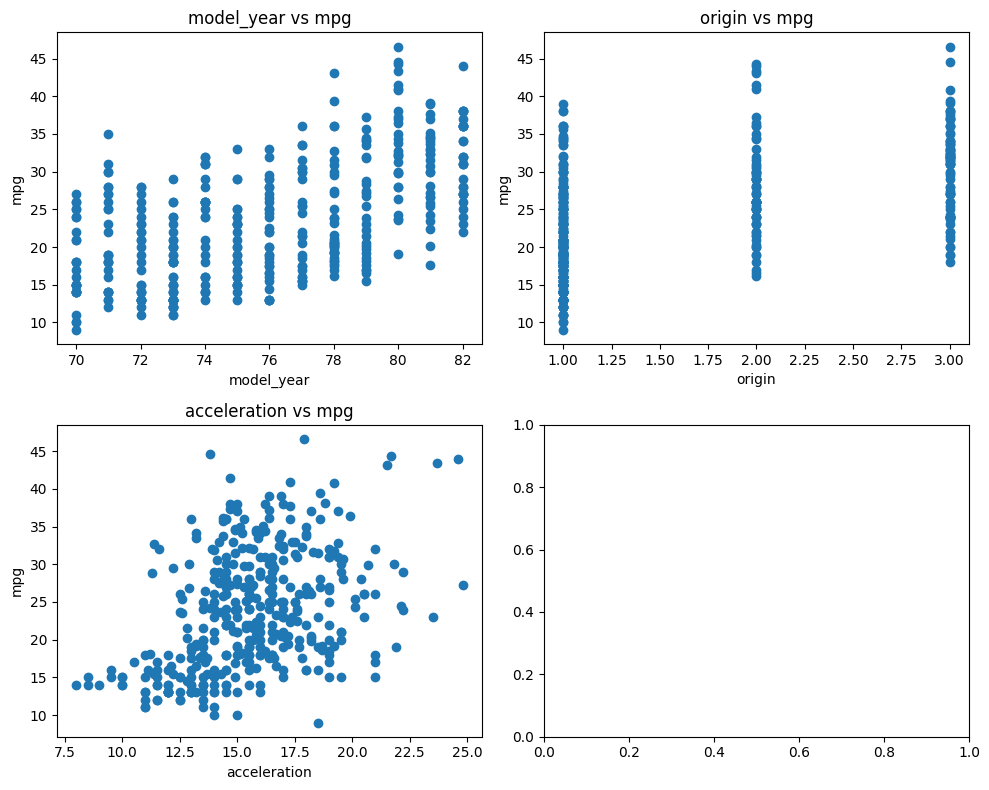

In [18]:
# let's chechk the graph of all strong corelations vs mpg
features = ["model_year", "origin", "acceleration"]
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through each feature and create a scatter plot
for i, feature in enumerate(features):
    axes[i].scatter(auto_mpg[feature], auto_mpg["mpg"])
    axes[i].set_title(f'{feature} vs {"mpg"}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel("mpg")

# Adjust layout
plt.tight_layout()

In [19]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(auto_mpg, test_size=0.2, random_state=42)

In [20]:
train_label = train_set["mpg"]
train_label

3      16.0
18     27.0
376    37.0
248    36.1
177    23.0
       ... 
71     19.0
106    12.0
270    21.1
348    37.7
102    26.0
Name: mpg, Length: 318, dtype: float64

In [21]:
test_set["horsepower"].isnull().sum()

1

In [22]:
train_set["horsepower"].isnull().sum()

5

In [23]:
import sklearn

sklearn.set_config(display="diagram")

In [24]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

In [25]:
auto_mpg_num = train_set.select_dtypes(include=[np.number])
imputer.fit(auto_mpg_num)

SimpleImputer(strategy='median')

In [26]:
imputer.statistics_

array([4.0000e+00, 1.4850e+02, 9.2000e+01, 2.8225e+03, 1.5500e+01,
       7.6000e+01, 1.0000e+00, 2.2450e+01])

In [27]:
auto_mpg_num.median().values

array([4.0000e+00, 1.4850e+02, 9.2000e+01, 2.8225e+03, 1.5500e+01,
       7.6000e+01, 1.0000e+00, 2.2450e+01])

In [28]:
null_row_idx = train_set.isnull().any(axis=1)
train_set[null_row_idx]

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,mpg,company
336,4,140.0,NaN,2905,14.3,80,1,23.6,ford
374,4,151.0,NaN,3035,20.5,82,1,23.0,amc
32,4,98.0,NaN,2046,19.0,71,1,25.0,ford
354,4,100.0,NaN,2320,15.8,81,2,34.5,renault
330,4,85.0,NaN,1835,17.3,80,2,40.9,renault


In [29]:
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline(
    [("imputer", SimpleImputer(strategy="median")), ("Scaler", StandardScaler())]
)

In [30]:
num_pipeline

Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('Scaler', StandardScaler())])

In [31]:
auto_mpg_num = auto_mpg_num.drop(columns="mpg", axis=1)

In [32]:
auto_mpg_num_prepared = num_pipeline.fit_transform(auto_mpg_num)

In [33]:
auto_mpg_num_prepared = pd.DataFrame(
    auto_mpg_num_prepared,
    columns=num_pipeline.get_feature_names_out(),
    index=auto_mpg_num.index,
)
auto_mpg_num_prepared

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
3,1.527188,1.090196,1.266232,0.552826,-1.319334,-1.696667,-0.729494
18,-0.850515,-0.922996,-0.407925,-0.999667,-0.413182,-1.696667,1.738368
376,-0.850515,-0.981350,-0.947975,-1.124772,0.927922,1.638975,1.738368
248,-0.850515,-0.981350,-1.163996,-1.392854,0.275493,0.527094,1.738368
177,-0.850515,-0.747936,-0.218907,-0.327675,-0.231952,-0.306816,0.504437
...,...,...,...,...,...,...,...
71,-1.444941,-1.185587,-0.164902,-0.761372,-0.775643,-1.140727,1.738368
106,1.527188,1.537573,2.076307,1.822940,-1.138103,-0.862757,-0.729494
270,-0.850515,-0.563150,-0.218907,-0.540949,-0.304444,0.527094,1.738368
348,-0.850515,-1.000801,-1.109991,-1.094985,0.601707,1.361005,1.738368


In [34]:
from sklearn.linear_model import LinearRegression

lr = make_pipeline(num_pipeline, LinearRegression())
lr.fit(auto_mpg_num, train_label)

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                                 ('Scaler', StandardScaler())])),
                ('linearregression', LinearRegression())])

In [35]:
auto_mpg_train_preds = lr.predict(auto_mpg_num)

In [36]:
auto_mpg_train_preds[:5]

array([15.1652094 , 25.27688518, 35.955334  , 34.27794257, 24.32045547])

In [37]:
train_label.iloc[:5]

3      16.0
18     27.0
376    37.0
248    36.1
177    23.0
Name: mpg, dtype: float64

In [38]:
from sklearn.metrics import mean_squared_error

Lr_rmse = mean_squared_error(train_label, auto_mpg_train_preds, squared=False)
Lr_rmse

c:\Users\whate\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


3.4146489576445127

In [39]:
from sklearn.metrics import r2_score

print("train", lr.score(auto_mpg_num, train_label))

train 0.8140266343564077


In [40]:
X_test = test_set.drop("mpg", axis=1)
y_test = test_set["mpg"].copy()

In [41]:
X_test = test_set.drop("company", axis=1)

In [42]:
X_test = X_test.drop(columns="mpg", axis=1)

In [43]:
preds = lr.predict(X_test)
preds

array([32.88368493, 29.55459417, 21.3718659 , 16.79628647, 12.49782068,
       27.2046645 , 27.89800397,  9.77165344, 16.88442122, 22.0540662 ,
       12.80635705, 36.15568856, 25.1661076 , 13.69382409, 23.98582684,
        6.3883161 , 29.5343692 , 23.57112622, 16.32778117, 36.28538748,
       23.7134936 , 18.98764811, 28.71412969, 28.73877299, 14.99652121,
       34.6575622 , 25.4821424 , 24.95005242, 21.94879986,  8.79219072,
       28.42950195, 34.85661409, 20.52591932, 26.07090375, 34.25273942,
       11.98064645, 22.93096389, 21.73987752, 12.32749334, 26.74860926,
       26.23695048, 27.42339244, 20.14897396,  7.26055737, 24.5385914 ,
       34.93942715, 26.75997869, 24.19174837, 22.5108243 , 27.56278227,
       22.68115083, 33.67307051, 32.67193897, 10.95350642, 27.70432579,
       10.00803613, 19.76541978, 29.87543374, 23.17356302, 20.47405498,
       16.17843891, 32.09572605, 24.01962498, 20.49863738, 20.92718641,
       25.51129364, 25.11828091, 32.38104979, 28.07285138, 12.71

In [44]:
print("test", lr.score(X_test, y_test))

test 0.8475229080116506


In [45]:
print("accuracy_score", r2_score(preds, y_test))

accuracy_score 0.8518319783722126


In [46]:
from sklearn.tree import DecisionTreeRegressor

Dt = make_pipeline(num_pipeline, DecisionTreeRegressor(random_state=42))
Dt.fit(auto_mpg_num, train_label)

auto_mpg_preds = Dt.predict(auto_mpg_num)
Dt_rmse = mean_squared_error(train_label, auto_mpg_preds)
Dt_rmse

0.0

In [47]:
from sklearn.ensemble import RandomForestRegressor

Rf = make_pipeline(num_pipeline, RandomForestRegressor())
Rf
Rf.fit(auto_mpg_num, train_label)

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                                 ('Scaler', StandardScaler())])),
                ('randomforestregressor', RandomForestRegressor())])

In [48]:
preds = Rf.predict(auto_mpg_num)
Rf_rmse = mean_squared_error(train_label, preds, squared=False)
Rf_rmse

c:\Users\whate\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


1.0919498658061013

In [49]:
print("accuracy_score_rf_train", r2_score(preds, train_label))

accuracy_score_rf_train 0.9792613147079224


In [50]:
test_preds = Rf.predict(X_test)

In [51]:
print("test", Rf.score(X_test, y_test))

test 0.9116297686138113


In [52]:
Rf_rmse_test = mean_squared_error(y_test, test_preds, squared=False)
Rf_rmse_test

c:\Users\whate\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


2.17975986636143

In [53]:
from sklearn.model_selection import cross_val_score

RF_rmse_s = -cross_val_score(
    Rf, auto_mpg_num, train_label, scoring="neg_root_mean_squared_error", cv=10
)

pd.Series(RF_rmse_s).describe()

count    10.000000
mean      2.955086
std       0.545653
min       2.106110
25%       2.588443
50%       3.014036
75%       3.275288
max       3.947579
dtype: float64

In [54]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV

In [55]:
full_pipeline = Pipeline(
    [
        ("preprocessing", num_pipeline),
        ("random_forest", RandomForestRegressor(random_state=42)),
    ]
)
full_pipeline

Pipeline(steps=[('preprocessing',
                 Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                                 ('Scaler', StandardScaler())])),
                ('random_forest', RandomForestRegressor(random_state=42))])

In [56]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {"random_forest__max_features": randint(low=2, high=20)}

rnd_search = RandomizedSearchCV(
    full_pipeline,
    param_distribs,
    n_iter=10,
    cv=3,
    scoring="neg_root_mean_squared_error",
    random_state=42,
)

rnd_search.fit(auto_mpg_num, train_label)

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('preprocessing',
                                              Pipeline(steps=[('imputer',
                                                               SimpleImputer(strategy='median')),
                                                              ('Scaler',
                                                               StandardScaler())])),
                                             ('random_forest',
                                              RandomForestRegressor(random_state=42))]),
                   param_distributions={'random_forest__max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000265D44AAD20>},
                   random_state=42, scoring='neg_root_mean_squared_error')

In [57]:
final_model = rnd_search.best_estimator_
feature_importance = final_model["random_forest"].feature_importances_
feature_importance.round(2)

array([0.18, 0.31, 0.14, 0.21, 0.03, 0.12, 0.01])

In [58]:
sorted(
    zip(feature_importance, final_model["preprocessing"].get_feature_names_out()),
    reverse=True,
)

[(0.3062460722598365, 'displacement'),
 (0.21244962133389036, 'weight'),
 (0.1827103230129618, 'cylinders'),
 (0.13853034081677132, 'horsepower'),
 (0.11921744367212828, 'model_year'),
 (0.03355012671372329, 'acceleration'),
 (0.007296072190688463, 'origin')]

In [59]:
final_preds = final_model.predict(X_test)
final_rmse = mean_squared_error(y_test, final_preds)

print(math.sqrt(final_rmse))

2.2150660825356874


In [60]:
print("Final_accuracy", r2_score(y_true=y_test, y_pred=final_preds))

Final_accuracy 0.9087438668472472


In [61]:
# computing a 95% interval

from scipy import stats

confidence = 0.95
sqared_errors = (final_preds - y_test) ** 2
np.sqrt(
    stats.t.interval(
        confidence,
        len(sqared_errors) - 1,
        loc=sqared_errors.mean(),
        scale=stats.sem(sqared_errors),
    )
)

array([1.72112452, 2.61739678])